In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis=1,inplace=True)

In [4]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
df1 = df[df.TotalCharges!=' ']

In [6]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\projects\digit_prediction\venv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

c:\projects\digit_prediction\venv\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [8]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

c:\projects\digit_prediction\venv\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [10]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [11]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [12]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')


gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [13]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [14]:
x_train.shape
len(x_train.columns)

26

In [15]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    # keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(np.array(x_train),np.array(y_train),epochs=5)

Epoch 1/5
176/176 [==============================] - 9s 4ms/step - loss: 0.5080 - accuracy: 0.7524
Epoch 2/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4267 - accuracy: 0.7948
Epoch 3/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.7998
Epoch 4/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4143 - accuracy: 0.8060
Epoch 5/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4126 - accuracy: 0.8043


In [18]:
model.evaluate(np.array(X_test),np.array(y_test))

44/44 [==============================] - 0s 3ms/step - loss: 0.4466 - accuracy: 0.7854


[0.4465620815753937, 0.7853589057922363]

In [19]:
yp = model.predict(np.array(X_test))

In [20]:
ypred = []
for i in yp:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [21]:
ypred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=ypred)

Text(69.0, 0.5, 'Truth')

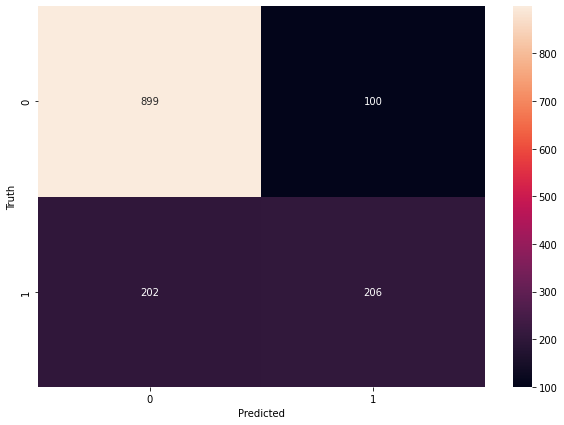

In [23]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
def ANN(x_train,y_train,x_test,y_test,loss,weights):
    model = keras.Sequential(
        [
            keras.layers.Dense(26, input_dim=x_train.shape[1],activation='relu'),
            keras.layers.Dense(15,activation='relu'),
            keras.layers.Dense(1,activation='sigmoid'),
        ]
    )
    model.compile(optimizer='adam',loss=loss,metrics=['AUC'])
    if weights==-1:
        model.fit(np.array(x_train),np.array(y_train),epochs=60)
    else:
        model.fit(np.array(x_train),np.array(y_train),epochs=60,class_weight=weights)
    print(model.evaluate(np.array(x_test),np.array(y_test)))
    ypreds = model.predict(np.array(x_test))
    ypreds = np.round(ypreds)
    print('classification report :',classification_report(y_test,ypreds))
    return ypreds

In [25]:
import math
def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    
    return class_weight

In [40]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)


In [41]:
dict(y_train.value_counts())

{0: 4130, 1: 1495}

In [42]:
4164 / 1461

2.8501026694045173

In [38]:
create_class_weight(a,2.8)

{0: 1.3385629582987006, 1: 2.354714158428992}

In [37]:
create_class_weight(a,2)

{0: 1.0020907216774877, 1: 2.018241921807779}

In [29]:
a = dict(y_train.value_counts())
w = create_class_weight(a,2.8)

In [35]:
ypreds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',w)

Epoch 1/60
176/176 [==============================] - 1s 6ms/step - loss: 0.8975 - auc: 0.7776
Epoch 2/60
176/176 [==============================] - 1s 5ms/step - loss: 0.7958 - auc: 0.8281
Epoch 3/60
176/176 [==============================] - 1s 5ms/step - loss: 0.7779 - auc: 0.8371
Epoch 4/60
176/176 [==============================] - 1s 5ms/step - loss: 0.7716 - auc: 0.8399
Epoch 5/60
176/176 [==============================] - 1s 5ms/step - loss: 0.7643 - auc: 0.8432
Epoch 6/60
176/176 [==============================] - 1s 5ms/step - loss: 0.7606 - auc: 0.8451
Epoch 7/60
176/176 [==============================] - 1s 5ms/step - loss: 0.7595 - auc: 0.8453
Epoch 8/60
176/176 [==============================] - 1s 6ms/step - loss: 0.7561 - auc: 0.8468
Epoch 9/60
176/176 [==============================] - 1s 5ms/step - loss: 0.7545 - auc: 0.8476
Epoch 10/60
176/176 [==============================] - 1s 5ms/step - loss: 0.7512 - auc: 0.8490
Epoch 11/60
176/176 [============================

In [32]:
ypreds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/10
176/176 [==============================] - 2s 6ms/step - loss: 0.5165 - auc: 0.7314
Epoch 2/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4328 - auc: 0.8311
Epoch 3/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4253 - auc: 0.8380
Epoch 4/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4220 - auc: 0.8408
Epoch 5/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4191 - auc: 0.8435
Epoch 6/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4190 - auc: 0.8435
Epoch 7/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4169 - auc: 0.8450
Epoch 8/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4157 - auc: 0.8461
Epoch 9/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4153 - auc: 0.8464
Epoch 10/10
44/44 [==============================] - 0s 4ms/step - loss: 0.4170 - auc: 0.8459
[0.4169995188713074, 0.8459033966064453]
classifica

In [33]:
ypreds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',{0:1,1:1})

Epoch 1/10
176/176 [==============================] - 2s 6ms/step - loss: 0.5084 - auc: 0.7426
Epoch 2/10
176/176 [==============================] - 1s 6ms/step - loss: 0.4315 - auc: 0.8325
Epoch 3/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4250 - auc: 0.8384
Epoch 4/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4223 - auc: 0.8408
Epoch 5/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4192 - auc: 0.8433
Epoch 6/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4182 - auc: 0.8443
Epoch 7/10
176/176 [==============================] - 1s 6ms/step - loss: 0.4165 - auc: 0.8456
Epoch 8/10
176/176 [==============================] - 1s 6ms/step - loss: 0.4151 - auc: 0.8468
Epoch 9/10
176/176 [==============================] - 1s 6ms/step - loss: 0.4139 - auc: 0.8479
Epoch 10/10
44/44 [==============================] - 0s 4ms/step - loss: 0.4235 - auc: 0.8460
[0.42353183031082153, 0.8459693193435669]
classific

In [46]:
df2_0 = df2[df2['Churn']==0]
df2_1 = df2[df2['Churn']==1]

In [50]:
print(df2_1.shape)
print(df2_0.shape)

(1869, 27)
(5163, 27)


In [48]:
df_under_0 = df2_0.sample(df2_1.shape[0])
pd.concat()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

HANDLING IMBALANCED DATASET

RANDOM UNDERSAMPLING

In [51]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [52]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [54]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [55]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [56]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/60
94/94 [==============================] - 2s 9ms/step - loss: 0.6478 - auc: 0.6954
Epoch 2/60
94/94 [==============================] - 1s 8ms/step - loss: 0.5430 - auc: 0.8070
Epoch 3/60
94/94 [==============================] - 1s 8ms/step - loss: 0.5085 - auc: 0.8293
Epoch 4/60
94/94 [==============================] - 1s 8ms/step - loss: 0.4988 - auc: 0.8356
Epoch 5/60
94/94 [==============================] - 1s 8ms/step - loss: 0.4943 - auc: 0.8381
Epoch 6/60
94/94 [==============================] - 1s 8ms/step - loss: 0.4896 - auc: 0.8417
Epoch 7/60
94/94 [==============================] - 1s 8ms/step - loss: 0.4861 - auc: 0.8438
Epoch 8/60
94/94 [==============================] - 1s 9ms/step - loss: 0.4834 - auc: 0.8460
Epoch 9/60
94/94 [==============================] - 1s 8ms/step - loss: 0.4821 - auc: 0.8466
Epoch 10/60
94/94 [==============================] - 1s 8ms/step - loss: 0.4808 - auc: 0.8476
Epoch 11/60
94/94 [==============================] - 1s 8ms/step - lo

RANDOM OVERSAMPLING

In [57]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [59]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [60]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/60
259/259 [==============================] - 3s 9ms/step - loss: 0.5538 - auc: 0.7992
Epoch 2/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4911 - auc: 0.8411
Epoch 3/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4839 - auc: 0.8453
Epoch 4/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4799 - auc: 0.8477
Epoch 5/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4757 - auc: 0.8508
Epoch 6/60
259/259 [==============================] - 2s 7ms/step - loss: 0.4737 - auc: 0.8516
Epoch 7/60
259/259 [==============================] - 1s 5ms/step - loss: 0.4707 - auc: 0.8537
Epoch 8/60
259/259 [==============================] - 1s 5ms/step - loss: 0.4678 - auc: 0.8555
Epoch 9/60
259/259 [==============================] - 1s 5ms/step - loss: 0.4652 - auc: 0.8576
Epoch 10/60
259/259 [==============================] - 1s 5ms/step - loss: 0.4622 - auc: 0.8591
Epoch 11/60
259/259 [============================

SMOTE

In [62]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/60
259/259 [==============================] - 3s 9ms/step - loss: 0.5292 - auc: 0.8113
Epoch 2/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4757 - auc: 0.8503
Epoch 3/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4658 - auc: 0.8572
Epoch 4/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4589 - auc: 0.8617
Epoch 5/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4547 - auc: 0.8650
Epoch 6/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4500 - auc: 0.8679
Epoch 7/60
259/259 [==============================] - 2s 7ms/step - loss: 0.4447 - auc: 0.8711
Epoch 8/60
259/259 [==============================] - 2s 6ms/step - loss: 0.4426 - auc: 0.8725
Epoch 9/60
259/259 [==============================] - 1s 5ms/step - loss: 0.4373 - auc: 0.8758
Epoch 10/60
259/259 [==============================] - 1s 5ms/step - loss: 0.4348 - auc: 0.8774
Epoch 11/60
259/259 [============================

Ensemble with undersampling

In [65]:

# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [67]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [68]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [69]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]


In [70]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [71]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/60
94/94 [==============================] - 3s 14ms/step - loss: 0.5948 - auc: 0.7694
Epoch 2/60
94/94 [==============================] - 1s 13ms/step - loss: 0.5106 - auc: 0.8265
Epoch 3/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4951 - auc: 0.8379
Epoch 4/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4899 - auc: 0.8415
Epoch 5/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4829 - auc: 0.8469
Epoch 6/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4811 - auc: 0.8479
Epoch 7/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4788 - auc: 0.8502
Epoch 8/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4753 - auc: 0.8525
Epoch 9/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4738 - auc: 0.8535
Epoch 10/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4723 - auc: 0.8544
Epoch 11/60
94/94 [==============================] - 1s 13m

In [72]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/60
94/94 [==============================] - 2s 12ms/step - loss: 0.6400 - auc: 0.7351
Epoch 2/60
94/94 [==============================] - 1s 13ms/step - loss: 0.5360 - auc: 0.8121
Epoch 3/60
94/94 [==============================] - 1s 12ms/step - loss: 0.4988 - auc: 0.8328
Epoch 4/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4858 - auc: 0.8431
Epoch 5/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4834 - auc: 0.8443
Epoch 6/60
94/94 [==============================] - 1s 14ms/step - loss: 0.4804 - auc: 0.8474
Epoch 7/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4761 - auc: 0.8493
Epoch 8/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4730 - auc: 0.8527
Epoch 9/60
94/94 [==============================] - 1s 14ms/step - loss: 0.4730 - auc: 0.8514
Epoch 10/60
94/94 [==============================] - 1s 13ms/step - loss: 0.4685 - auc: 0.8550
Epoch 11/60
94/94 [==============================] - 1s 13m

In [73]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/60
83/83 [==============================] - 2s 13ms/step - loss: 0.6439 - auc: 0.6828
Epoch 2/60
83/83 [==============================] - 1s 13ms/step - loss: 0.5479 - auc: 0.8029
Epoch 3/60
83/83 [==============================] - 1s 13ms/step - loss: 0.5057 - auc: 0.8282
Epoch 4/60
83/83 [==============================] - 1s 14ms/step - loss: 0.4887 - auc: 0.8377
Epoch 5/60
83/83 [==============================] - 1s 13ms/step - loss: 0.4813 - auc: 0.8417
Epoch 6/60
83/83 [==============================] - 1s 13ms/step - loss: 0.4768 - auc: 0.8436
Epoch 7/60
83/83 [==============================] - 1s 14ms/step - loss: 0.4721 - auc: 0.8473
Epoch 8/60
83/83 [==============================] - 1s 13ms/step - loss: 0.4706 - auc: 0.8473
Epoch 9/60
83/83 [==============================] - 1s 14ms/step - loss: 0.4690 - auc: 0.8483
Epoch 10/60
83/83 [==============================] - 1s 13ms/step - loss: 0.4679 - auc: 0.8489
Epoch 11/60
83/83 [==============================] - 1s 13m

In [74]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [75]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407



In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [78]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)


In [79]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

model3 = LogisticRegression()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [80]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [81]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407

